In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_csv('Train.csv')
train_df

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,CR_88991,11-JAN-02,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34,1
23852,CR_46369,05-FEB-97,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43,1
23853,CR_157556,03-APR-12,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18,1
23854,CR_103180,25-JAN-04,0,39,39,6,5,2,7,1,6,1,127,0.0,112,103,43,1


In [3]:
test_df = pd.read_csv('Test.csv')
test_df

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34


In [4]:
train_df.dtypes

INCIDENT_ID           object
DATE                  object
X_1                    int64
X_2                    int64
X_3                    int64
X_4                    int64
X_5                    int64
X_6                    int64
X_7                    int64
X_8                    int64
X_9                    int64
X_10                   int64
X_11                   int64
X_12                 float64
X_13                   int64
X_14                   int64
X_15                   int64
MALICIOUS_OFFENSE      int64
dtype: object

In [5]:
test_df.dtypes

INCIDENT_ID     object
DATE            object
X_1              int64
X_2              int64
X_3              int64
X_4              int64
X_5              int64
X_6              int64
X_7              int64
X_8              int64
X_9              int64
X_10             int64
X_11             int64
X_12           float64
X_13             int64
X_14             int64
X_15             int64
dtype: object

In [6]:
#Convert datetime type and drop unnecessary feature
train_df.DATE = pd.to_datetime(train_df.DATE)
train_df.drop(columns=['INCIDENT_ID'],inplace=True)

In [7]:
train_df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


Check missing value

In [8]:
train_df.isnull().sum()

DATE                   0
X_1                    0
X_2                    0
X_3                    0
X_4                    0
X_5                    0
X_6                    0
X_7                    0
X_8                    0
X_9                    0
X_10                   0
X_11                   0
X_12                 182
X_13                   0
X_14                   0
X_15                   0
MALICIOUS_OFFENSE      0
dtype: int64

In [9]:
test_df.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [10]:
train_df.X_12.unique()

array([ 1.,  0.,  3.,  2.,  6., 12.,  4., nan,  5., 11., 90., 20.,  8.,
       16., 30., 10.,  7., 50.,  9., 58., 14., 40., 15., 17.])

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train_df.X_12 = imputer.fit_transform(train_df[['X_12']])

Check coefficient

In [12]:
train_df.corr().nlargest(18, 'MALICIOUS_OFFENSE')['MALICIOUS_OFFENSE'].index

Index(['MALICIOUS_OFFENSE', 'X_11', 'X_15', 'X_1', 'X_13', 'X_9', 'X_4', 'X_5',
       'X_6', 'X_7', 'X_14', 'X_3', 'X_2', 'X_8', 'X_12', 'X_10'],
      dtype='object')

In [13]:
train_df['Day'] = train_df.DATE.dt.day
train_df['Month'] = train_df.DATE.dt.month
train_df['Year'] = train_df.DATE.dt.year

In [14]:
train_df.corr().nlargest(18, 'MALICIOUS_OFFENSE')['MALICIOUS_OFFENSE'].index

Index(['MALICIOUS_OFFENSE', 'X_11', 'X_15', 'X_1', 'Month', 'X_13', 'Day',
       'X_9', 'Year', 'X_4', 'X_5', 'X_6', 'X_7', 'X_14', 'X_3', 'X_2', 'X_8',
       'X_12'],
      dtype='object')

In [15]:
train_df.drop(columns=['DATE'],inplace=True)

<AxesSubplot:>

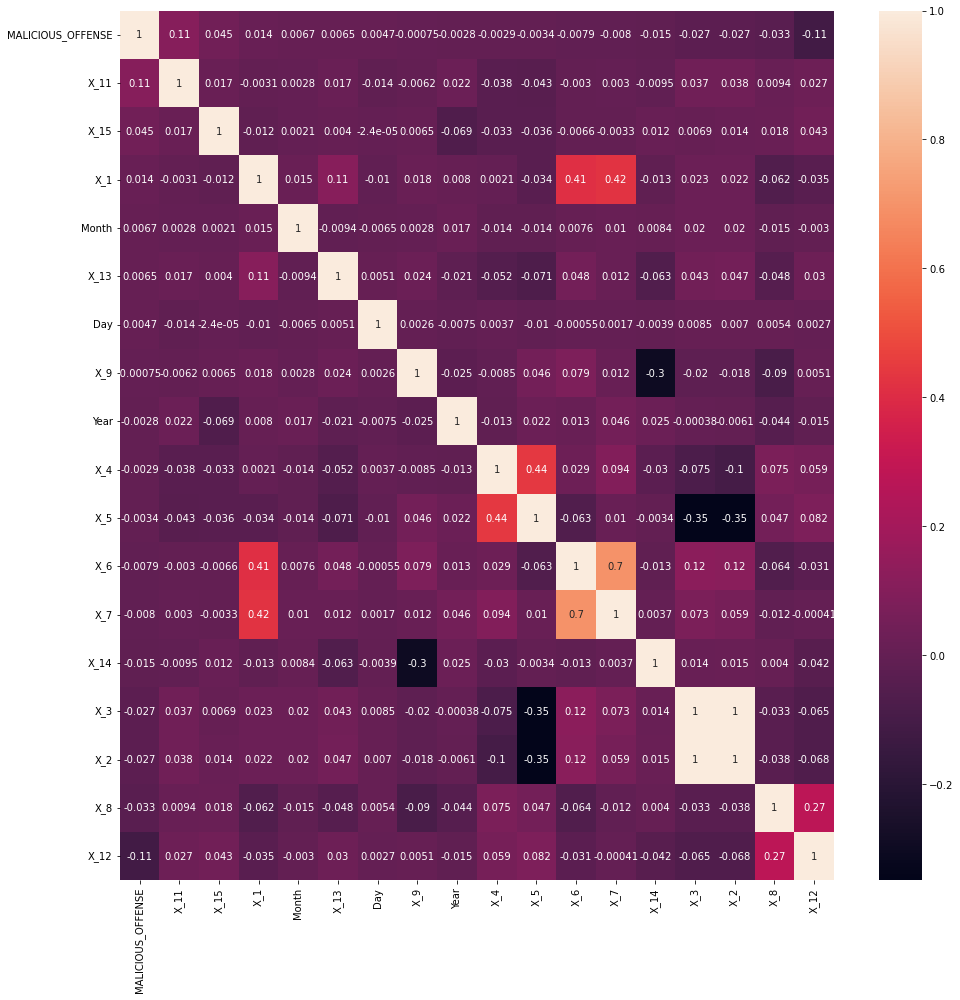

In [16]:
plt.figure(figsize=(16,16))
decrease_order = train_df.corr().nlargest(18, 'MALICIOUS_OFFENSE')['MALICIOUS_OFFENSE'].index
sns.heatmap(train_df[decrease_order].corr(),annot=True)

Check imbalance class

<AxesSubplot:ylabel='MALICIOUS_OFFENSE'>

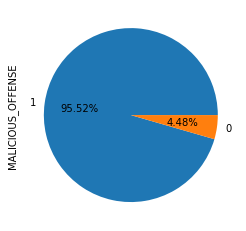

In [17]:
label = train_df.MALICIOUS_OFFENSE.value_counts()
label.plot(kind='pie',autopct='%1.2f%%')

Create train and test data

In [18]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=['MALICIOUS_OFFENSE'])
Y = train_df.MALICIOUS_OFFENSE
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=8)

In [19]:
print('Training feature shape:', X_train.shape)
print('Test feature shape:', X_test.shape)
print('Training label shape:', Y_train.shape)
print('Test label shape:', Y_test.shape)

Training feature shape: (17892, 18)
Test feature shape: (5964, 18)
Training label shape: (17892,)
Test label shape: (5964,)


In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.85)
X_resample,Y_resample = oversample.fit_resample(X_train,Y_train)
print('Resampled Training features shape:', X_resample.shape)
print('Resampled Training labels shape:', Y_resample.shape)

Resampled Training features shape: (31664, 18)
Resampled Training labels shape: (31664,)


Training model

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric="auc")
xgb.fit(X_resample, Y_resample,eval_set=[(X_resample, Y_resample), (X_test, Y_test)], verbose=True)

[0]	validation_0-auc:0.99531	validation_1-auc:0.99230
[1]	validation_0-auc:0.99687	validation_1-auc:0.99486
[2]	validation_0-auc:0.99794	validation_1-auc:0.99578
[3]	validation_0-auc:0.99862	validation_1-auc:0.99696
[4]	validation_0-auc:0.99922	validation_1-auc:0.99803
[5]	validation_0-auc:0.99919	validation_1-auc:0.99798
[6]	validation_0-auc:0.99962	validation_1-auc:0.99799
[7]	validation_0-auc:0.99974	validation_1-auc:0.99845
[8]	validation_0-auc:0.99983	validation_1-auc:0.99875
[9]	validation_0-auc:0.99986	validation_1-auc:0.99864
[10]	validation_0-auc:0.99989	validation_1-auc:0.99875
[11]	validation_0-auc:0.99992	validation_1-auc:0.99886
[12]	validation_0-auc:0.99994	validation_1-auc:0.99893
[13]	validation_0-auc:0.99995	validation_1-auc:0.99900
[14]	validation_0-auc:0.99996	validation_1-auc:0.99914
[15]	validation_0-auc:0.99996	validation_1-auc:0.99920
[16]	validation_0-auc:0.99997	validation_1-auc:0.99928
[17]	validation_0-auc:0.99997	validation_1-auc:0.99938
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
from sklearn.metrics import accuracy_score
Y_pred = xgb.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.9978202548625084

Performance of model

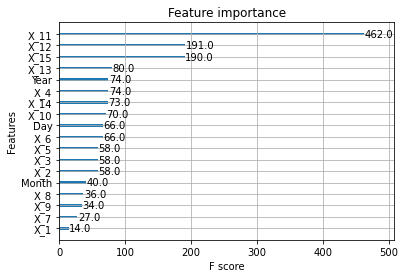

In [23]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

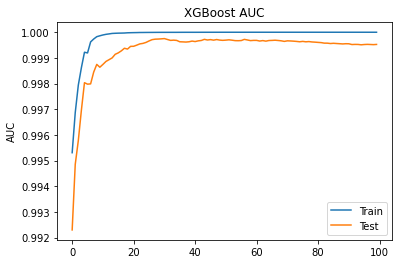

In [24]:
results = xgb.evals_result()
epochs = len(results['validation_0' ]['auc'])
x_axis = range(0, epochs)
 
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

Predict on Test.csv

In [25]:
test_df.DATE = pd.to_datetime(test_df.DATE)
test_incident_id = test_df.INCIDENT_ID
test_df.drop(columns=['INCIDENT_ID'],inplace=True)
test_df.X_12 = imputer.fit_transform(test_df[['X_12']])
test_df['Day'] = test_df.DATE.dt.day
test_df['Month'] = test_df.DATE.dt.month
test_df['Year'] = test_df.DATE.dt.year
test_df.drop(columns=['DATE'],inplace=True)

In [26]:
y_predict = xgb.predict(test_df)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
submission_df = pd.DataFrame({'INCIDIENT_ID': test_incident_id,'MALICIOUS_OFFENSE': y_predict})
submission_df

,INCIDIENT_ID,MALICIOUS_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
...,...,...
15898,CR_44468,1
15899,CR_158460,1
15900,CR_115946,1
15901,CR_137663,1


<AxesSubplot:ylabel='MALICIOUS_OFFENSE'>

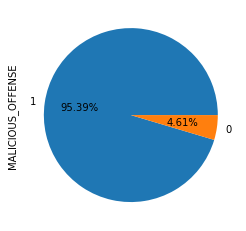

In [28]:
submission_df.MALICIOUS_OFFENSE.value_counts().plot(kind='pie',autopct='%1.2f%%')

In [29]:
submission_df.to_csv('submission',index=False)